# **Prepare**

In [44]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
%cd /content/drive/MyDrive/Colab_Notebooks/GreenLabs/Segmentation/

/content/drive/MyDrive/Colab_Notebooks/GreenLabs/Segmentation


In [46]:
# %cd /content/drive/MyDrive/Colab_Notebooks/GreenLabs/Segmentation/
# install dependencies as necessary
# !pip install googleDriveFileDownloader
# !pip install torch==1.7.0+cu101 torchvision==0.8.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

!pip install mxnet-cu101mkl gluoncv

In [47]:
# %cd /content/drive/MyDrive/Colab_Notebooks/GreenLabs/Segmentation/
# !wget https://files.pythonhosted.org/packages/45/3f/e33e3f92110fa5caba5e9eb052008208a33c1d5faccc7fe5312532e9aa42/mxnet_cu101mkl-1.6.0.post0-py2.py3-none-manylinux1_x86_64.whl
# !wget https://files.pythonhosted.org/packages/8a/10/0c4d40de3047a0c7c05ec42e8b4adcbaba602a2a05b375aa91a0a1417f95/gluoncv-0.10.1-py3-none-any.whl


In [48]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
from gluoncv.data.transforms.presets.segmentation import test_transform

from matplotlib import pyplot as plt

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import shutil

# using cpu
ctx = mx.cpu(0)

In [49]:
# Load our trained model
from gluoncv.data import datasets
from gluoncv.model_zoo.icnet import ICNet

dataset = 'mhpv1'
backbone = 'resnet50'
pretrained_base = True
print(datasets[dataset].CLASSES)
model = ICNet(datasets[dataset].NUM_CLASS, backbone=backbone,
                  pretrained_base=pretrained_base, ctx=ctx, 
                  root='./models/HumanParsing/')
# model.classes = ('hat', 'hair', 'sunglasses', 'upper clothes', 'skirt', 'pants', 'dress', 'belt', 'left shoe', 'right shoe', 'face', 'left leg', 'right leg', 'left arm', 'right arm', 'bag', 'scarf', 'torso skin')
model.classes = datasets[dataset].CLASSES

model.load_parameters('./models/HumanParsing/icnet_resnet50_mhpv1.params', ctx=ctx)

('background', 'hat', 'hair', 'sunglasses', 'upper clothes', 'skirt', 'pants', 'dress', 'belt', 'left shoe', 'right shoe', 'face', 'left leg', 'right leg', 'left arm', 'right arm', 'bag', 'scarf', 'torso skin')


(697, 374)


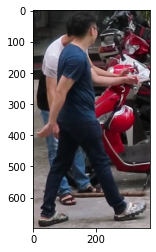

In [50]:
import cv2

# filename = './samples/images/AIteam.png'
# filename = './samples/images/airport.jpg'
# filename = './samples/images/mhp_v1_example.jpg'
# filename = './samples/images/GG_cam_01/person_150_0.jpg'
filename = './samples/images/task04_person_600_11.jpg'

# Load and visualize the image
img = image.imread(filename)
img_ori = cv2.imread(filename)

print(img_ori.shape[:2])

plt.imshow(img.asnumpy())
plt.show()

In [51]:
import time
img = test_transform(img, ctx)

print('img: ', img.shape)

start = time.time()
output = model.predict(img)
# output = model.demo(img)
end = time.time()

print('Prediction time (s): ', end-start)

print('output: ', output.shape)

predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

img:  (1, 3, 697, 374)
Prediction time (s):  0.04660367965698242
output:  (1, 19, 704, 376)


In [52]:
from PIL import Image
mask = Image.fromarray(predict.astype('uint8'))
mask.size
pixels = list(mask.getdata())
print(pixels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

1
(704, 376)


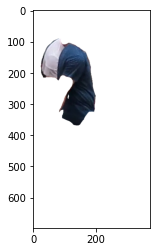

In [53]:
import numpy as np
import cv2

thresh = np.array(mask)
thresh[ thresh == 4 ] = 255 # upper clothes (4), pants (6)
thresh[ thresh != 255 ] = 0

# apply connected component analysis to the thresholded image
output = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

areas = stats[:,-1]
areas[0] = 0 # remove the label-0 (background)
max_label = areas.argmax()
print(max_label)
print(labels.shape)

img2 = np.zeros(labels.shape)
img2[labels == max_label] = 255

h, w = img_ori.shape[:2]
img2 = img2[0:h,0:w] # Crop mask corresponding to the original image

# Apply the mask to the original image
img_ori[img2 == 0] = 255
img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)

# plt.imshow(thresh)
# plt.imshow(img2)
plt.imshow(img_ori)

plt.show()

In [54]:
# Color names
# 11 basic colors: black, blue, brown, grey, green, orange, pink, purple, red, white, yellow
# 11 color values: [0, 0, 0], [0, 0, 255], [128, 102, 64], [128, 128, 128], [0, 255, 0], [255, 128, 0],
# [255, 128, 255], [255, 0, 255], [255, 0, 0], [255, 255, 255], [255, 255, 0]
# Ref:
# http://lear.inrialpes.fr/people/vandeweijer/color_names.html
# https://medium.com/analytics-vidhya/building-rgb-color-classifier-part-1-af58e3bcfef7
# https://stackoverflow.com/questions/28862334/k-means-with-selected-initial-centers
# https://stackoverflow.com/questions/60205100/define-cluster-centers-manually
# https://towardsdatascience.com/k-means-8x-faster-27x-lower-error-than-scikit-learns-in-25-lines-eaedc7a3a0c8
# https://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/
# https://github.com/AjinkyaChavan9/RGB-Color-Classifier-with-Deep-Learning-using-Keras-and-Tensorflow/tree/master/RGB%20Color%20Classifier

# import the necessary packages
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
import cv2
import pandas as pd

#Reading csv file with pandas and giving names to each column
index = ['R', 'G', 'B', 'color_name']
color_dataset = pd.read_csv('./models/Color/final_data.csv', names=index)
len_dataset = len(color_dataset)
print(len_dataset)

def get_model(color_dataset):
    # cluster the pixel intensities
    n_clusters = 11
    model = KMeans(n_clusters)
    model.fit(im_vec)
    return model


def get_color_name(R, G, B, color_dataset):
    minimum = 10000
    for i in range(1,len(color_dataset)):
        d_R = abs(R-int(color_dataset.loc[i,"R"])) 
        d_G = abs(G-int(color_dataset.loc[i,"G"]))
        d_B = abs(B-int(color_dataset.loc[i,"B"]))
        d = d_R + d_G + d_B
        if (d<=minimum):
            minimum = d
            cname = color_dataset.loc[i,"color_name"]
    return cname

# 1. Get RGB pixels from the region of the masked image
# reshape the image to be a list of pixels
im_vec = img_ori.reshape((img_ori.shape[0] * img_ori.shape[1], 3))
mask2 = img2.reshape((img_ori.shape[0] * img_ori.shape[1]))
indices = np.where(mask2==255)[0]
im_vec = im_vec[indices,:]

print(len(im_vec))

# 2. Cluster the data to extract dominant colors in the selected human part
# cluster the pixel intensities
n_clusters = 11
clt = KMeans(n_clusters)
clt.fit(im_vec)

# the cluster centers are our dominant colors.
COLORS = clt.cluster_centers_
# convert to integer from float
COLORS = COLORS.astype(int)

print(COLORS)

# Labels
labels = clt.labels_
LABELS = list(set(labels))
print(labels)
for label in LABELS:
    n_samples = len(labels[labels==label])
    print(label, ' : ', n_samples)

# 3. From the color dataset, decide the dominant color names (belong to 11 basic colors)
for color in COLORS:
    (R, G, B) = color
    c_name = get_color_name(R, G, B, color_dataset)
    print(c_name)


5053
27585
[[ 25  34  50]
 [198 193 208]
 [104  95 106]
 [ 14  21  31]
 [224 222 236]
 [147 135 145]
 [174 165 178]
 [ 48  68  99]
 [ 58  88 129]
 [ 37  50  70]
 [ 78  61  68]]
[5 6 1 ... 3 3 3]
0  :  5879
1  :  1365
2  :  938
3  :  7474
4  :  1793
5  :  1036
6  :  1228
7  :  1851
8  :  2212
9  :  3183
10  :  626
Black
Grey
Grey
Black
Purple
Grey
Grey
Grey
Blue
Blue
Grey


In [55]:
# Color names
# 11 basic colors: black, blue, brown, grey, green, orange, pink, purple, red, white, yellow
# 11 color values: [0, 0, 0], [0, 0, 255], [128, 102, 64], [128, 128, 128], [0, 255, 0], [255, 128, 0],
# [255, 128, 255], [255, 0, 255], [255, 0, 0], [255, 255, 255], [255, 255, 0]
# Ref:
# http://lear.inrialpes.fr/people/vandeweijer/color_names.html
# https://medium.com/analytics-vidhya/building-rgb-color-classifier-part-1-af58e3bcfef7
# https://stackoverflow.com/questions/28862334/k-means-with-selected-initial-centers
# https://stackoverflow.com/questions/60205100/define-cluster-centers-manually
# https://towardsdatascience.com/k-means-8x-faster-27x-lower-error-than-scikit-learns-in-25-lines-eaedc7a3a0c8
# https://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/
# https://github.com/AjinkyaChavan9/RGB-Color-Classifier-with-Deep-Learning-using-Keras-and-Tensorflow/tree/master/RGB%20Color%20Classifier

# import the necessary packages
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
import cv2
import pandas as pd

#Reading csv file with pandas and giving names to each column
index = ['R', 'G', 'B', 'color_name']
color_dataset = pd.read_csv('./models/Color/final_data.csv', names=index)
len_dataset = len(color_dataset)
print(len_dataset)


def get_color_name(R, G, B, color_dataset):
    minimum = 10000
    for i in range(1,len(color_dataset)):
        d_R = abs(R-int(color_dataset.loc[i,"R"])) 
        d_G = abs(G-int(color_dataset.loc[i,"G"]))
        d_B = abs(B-int(color_dataset.loc[i,"B"]))
        d = d_R + d_G + d_B
        if (d<=minimum):
            minimum = d
            cname = color_dataset.loc[i,"color_name"]
    return cname

# 1. Get RGB pixels from the region of the masked image
# reshape the image to be a list of pixels
im_vec = img_ori.reshape((img_ori.shape[0] * img_ori.shape[1], 3))
mask2 = img2.reshape((img_ori.shape[0] * img_ori.shape[1]))
indices = np.where(mask2==255)[0]
im_vec = im_vec[indices,:]

print(len(im_vec))

# 2. Cluster the data to extract dominant colors in the selected human part
# cluster the pixel intensities
n_clusters = 11
clt = KMeans(n_clusters)
clt.fit(im_vec)

# the cluster centers are our dominant colors.
COLORS = clt.cluster_centers_
# convert to integer from float
COLORS = COLORS.astype(int)

print(COLORS)

# Labels
labels = clt.labels_
LABELS = list(set(labels))
print(labels)
for label in LABELS:
    n_samples = len(labels[labels==label])
    print(label, ' : ', n_samples)

# 3. From the color dataset, decide the dominant color names (belong to 11 basic colors)
for color in COLORS:
    (R, G, B) = color
    c_name = get_color_name(R, G, B, color_dataset)
    print(c_name)


5053
27585
[[ 14  21  31]
 [175 166 179]
 [ 47  67  98]
 [147 136 145]
 [ 36  49  70]
 [224 222 236]
 [104  95 106]
 [ 77  61  68]
 [ 24  33  49]
 [ 58  88 129]
 [198 193 208]]
[ 3  1 10 ...  0  0  0]
0  :  7398
1  :  1232
2  :  1870
3  :  1065
4  :  3245
5  :  1789
6  :  950
7  :  633
8  :  5777
9  :  2290
10  :  1336
Black
Grey
Grey
Grey
Blue
Purple
Grey
Grey
Black
Blue
Grey


<PIL.Image.Image image mode=L size=376x704 at 0x7FC1C2A7D450>


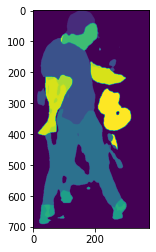

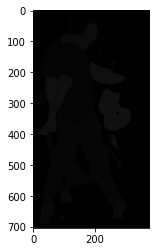


[16]
<NDArray 1 @cpu(0)>
[ 0  2  4  6  9 10 11 14 15 16]


In [56]:
# Save prediction to PNG
# And load to visualize the result
from PIL import Image
import matplotlib.image as mpimg
from mxnet import image
import numpy as np

# file_path = './outputs/output_AIteam.png'
# file_path = './outputs/output_airport.png'
# file_path = './outputs/GG_cam_01_person_150_0.png'
file_path = './outputs/task04_person_600_11.png'

mask = Image.fromarray(predict.astype('uint8'))
print(mask)
mask.save(file_path)
mmask = mpimg.imread(file_path)
plt.imshow(mmask)
plt.show()

mmask = image.imread(file_path)
plt.imshow(mmask.asnumpy())
plt.show()

print(mx.nd.max(mmask))
print(mx.np.unique(mmask.as_np_ndarray()))

9
9
[[     0      0    376    704 235270]
 [    25     91    175    278  27585]
 [   245    159     22     25    380]
 [   248    185     14     12    117]
 [    14    252     28     57   1117]
 [    75    343      3     16     25]
 [   143    397      4     11     32]
 [   252    432     16     16    106]
 [   243    435      7     14     72]]


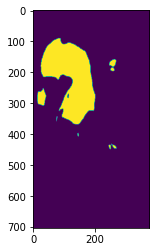

In [57]:
from mxnet import image
import numpy as np
import cv2

mmask = image.imread(file_path)
mmask = mmask.as_np_ndarray()

mask = cv2.imread(file_path)

# threshold true mask
comp = mmask[:, :, 0] == 4 # upper clothes

comp2 = mask[:,:,0] == 4

thresh = mask.copy()
thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
thresh[ thresh == 4 ] = 255
thresh[ thresh != 255 ] = 0

# apply connected component analysis to the thresholded image
output = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

print(len(centroids))
print(numLabels)
print(stats)

plt.imshow(thresh)

# plt.imshow(comp2)
# plt.imshow(comp.asnumpy())
plt.show()


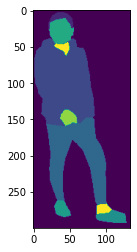

[0.0, 0.007843138, 0.015686275, 0.023529412, 0.03529412, 0.039215688, 0.043137256, 0.05882353, 0.07058824]


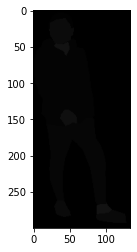


[18]
<NDArray 1 @cpu(0)>
[ 0  2  4  6  9 10 11 15 18]


In [58]:
import matplotlib.image as mpimg

file_path = './outputs/output_person_150_0.png'
mmask = mpimg.imread(file_path)
plt.imshow(mmask)
plt.show()
values = list(np.unique(mmask))
print(values)

mmask = image.imread(file_path)
plt.imshow(mmask.asnumpy())
plt.show()

print(mx.nd.max(mmask))
print(mx.np.unique(mmask.as_np_ndarray()))

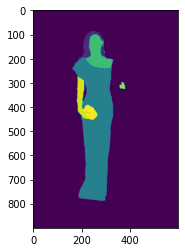

In [59]:
import matplotlib.image as mpimg

filename = './samples/images/mhpv1_0001_02_01.png'

# Load and visualize the image
iimg = mpimg.imread(filename)

plt.imshow(iimg)
plt.show()


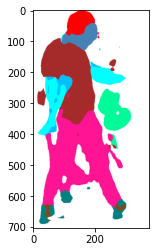

In [60]:
# Add color pallete for visualizing the predicted mask,
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg

mask = get_color_pallete(predict, 'mhpv1')
mask.save('./outputs/output_mhpv1.png')
mmask = mpimg.imread('./outputs/output_mhpv1.png')
plt.imshow(mmask)
plt.show()

In [61]:
# from PIL import Image

# # Parsing each person
# src_dir = './samples/images/'
# image_list = ['body0_airport.jpg', 'body0_AIteam.png', 'body1_airport.jpg', 'body1_AIteam.png', 
#               'body2_airport.jpg', 'body3_airport.jpg', 'body4_airport.jpg', 'body5_airport.jpg']

# for i, img_name in enumerate(image_list):
#     img_path = os.path.join(src_dir, img_name)
#     img = image.imread(img_path)
#     img = test_transform(img, ctx)
#     output = model.predict(img)
#     predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
#     mask = Image.fromarray(predict.astype('uint8'))
#     mask.save('./outputs/output_person_{}.png'.format(i))

In [62]:
from PIL import Image
import glob
import os

# Parsing each person
src_dir = './samples/images/GG_cam_05/'
dest_dir = './outputs/GG_cam_05/'
# image_list = ['body0_airport.jpg', 'body0_AIteam.png', 'body1_airport.jpg', 'body1_AIteam.png', 
#               'body2_airport.jpg', 'body3_airport.jpg', 'body4_airport.jpg', 'body5_airport.jpg']
image_paths = glob.glob(os.path.join(src_dir, '*.jpg'))

for i, img_path in enumerate(image_paths):
    # img_path = os.path.join(src_dir, img_name)
    img = image.imread(img_path)
    img = test_transform(img, ctx)
    output = model.predict(img)
    predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
    mask = get_color_pallete(predict, 'mhpv1')
    # mask.save('./outputs/mhpv1_output_person_{}.png'.format(i))
    out_img_name = os.path.basename(img_path)
    out_img_name = out_img_name.replace('.jpg','.png')
    out_img_path = os.path.join(dest_dir, out_img_name)
    mask.save(out_img_path)